In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_json('./data/train.json')

In [3]:
train.shape

(49352, 15)

In [4]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [6]:
train.bathrooms.describe()

count    49352.00000
mean         1.21218
std          0.50142
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         10.00000
Name: bathrooms, dtype: float64

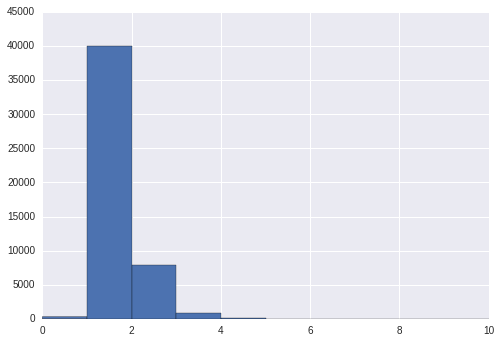

In [7]:
train.bathrooms.hist()

In [8]:
train.bedrooms.value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

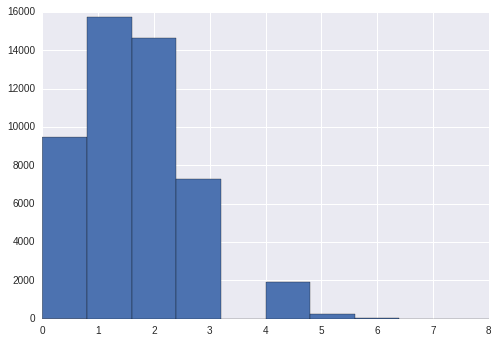

In [9]:
train.bedrooms.hist()

In [10]:
train.bedrooms.value_counts().to_dict()

{0: 9475, 1: 15752, 2: 14623, 3: 7276, 4: 1929, 5: 247, 6: 46, 7: 2, 8: 2}

In [11]:
train.shape

(49352, 15)

In [12]:
len(train.building_id.unique())

7585

In [13]:
train.created.describe()

count                   49352
unique                  48675
top       2016-04-15 02:24:25
freq                        3
Name: created, dtype: object

In [14]:
train.created.max(), train.created.min()

(u'2016-06-29 21:41:47', u'2016-04-01 22:12:41')

In [15]:
train.description[:10]

10        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
10000                                                      
100004    Top Top West Village location, beautiful Pre-w...
100007    Building Amenities - Garage - Garden - fitness...
100013    Beautifully renovated 3 bedroom flex 4 bedroom...
100014                                                     
100016    Stunning unit with a great location and lots o...
100020    This huge sunny ,plenty of lights 1 bed/2 bath...
100026                             <p><a  website_redacted 
100027    This is a spacious four bedroom with every bed...
Name: description, dtype: object

In [20]:
train.features[:2].values

array([[],
       [u'Doorman', u'Elevator', u'Fitness Center', u'Cats Allowed', u'Dogs Allowed']], dtype=object)

In [22]:
len(train.listing_id.unique())

49352

In [24]:
len(train.manager_id.unique())

3481

In [25]:
train.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [26]:
train.price.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

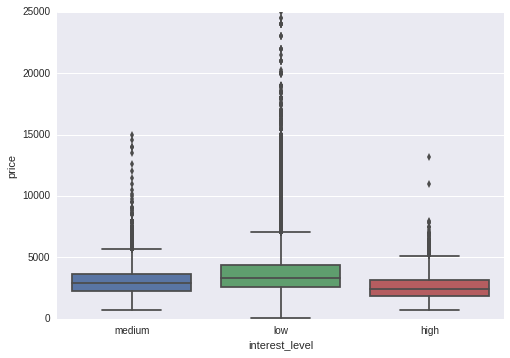

In [36]:
ax = sns.boxplot(x="interest_level", y="price", data=train[train.price < 25000])

In [37]:
len(train[train.price >= 25000])

81

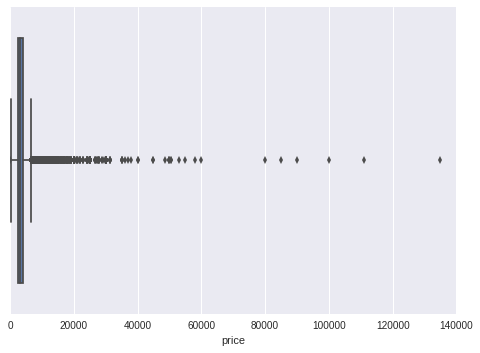

In [30]:
ax = sns.boxplot(x="price", data=train[train.price < 1000000])

In [32]:
train.price.median(), train.price.mean()

(3150.0, 3830.1740355000811)

In [38]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [52]:
simple_features = ['bathrooms','bedrooms','price']
target = 'interest_level'

In [40]:
test = pd.read_json('./data/test.json')

In [41]:
test.shape

(74659, 14)

In [42]:
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [43]:
from sklearn.linear_model import LogisticRegression

In [53]:
X_train = train[simple_features]

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train[target])

In [55]:
y_train

array([2, 1, 0, ..., 1, 1, 1])

In [58]:
np.bincount(y_train)

array([ 3839, 34284, 11229])

In [59]:
train[target].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [56]:
# high = 0, low = 1, medium = 2
le.classes_

array([u'high', u'low', u'medium'], dtype=object)

In [60]:
logit = LogisticRegression()

In [61]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
logit.coef_

array([[  4.31947340e-02,   5.24566493e-01,  -1.06556754e-03],
       [ -3.43971238e-01,  -4.95415485e-01,   6.67100865e-04],
       [  8.29521428e-03,   4.03986784e-01,  -4.30887153e-04]])

In [63]:
logit.intercept_

array([-0.0584934 , -0.24637841, -0.3954459 ])

In [64]:
# Accuracy score of training data set
logit.score(X_train, y_train)

0.69257578213648885

In [69]:
log_pred = logit.predict_proba(X_train)

In [70]:
pred = logit.predict(X_train)

In [73]:
np.bincount(pred)

array([   10, 48181,  1161])

In [75]:
len(pred[pred==0]), len(pred[pred==1])

(10, 48181)

In [76]:
log_pred[:5], pred[:5]

(array([[ 0.16728916,  0.44280596,  0.38990488],
        [ 0.0080708 ,  0.86833296,  0.12359625],
        [ 0.0741899 ,  0.69556252,  0.23024758],
        [ 0.04845643,  0.75224774,  0.19929583],
        [ 0.17606728,  0.39762079,  0.42631193]]), array([1, 1, 1, 1, 2]))

In [65]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logit, X_train, y_train, cv=10, scoring='log_loss')

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/base.py:284: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [66]:
scores

array([-0.73411375, -0.74095434, -0.72778943, -0.72288391, -0.73160762,
       -0.73042898, -0.72814807, -0.72693082, -0.73229986, -0.74030482])

In [109]:
scores.mean()

-0.73154616106859249

In [77]:
# Generate output
X_test = test[simple_features]
y_test_log_pred = logit.predict_proba(X_test)

In [79]:
y_test_log_pred.shape

(74659, 3)

In [102]:
y_id = test['listing_id'].astype('O')

In [85]:
logit.classes_

array([0, 1, 2])

In [87]:
le.classes_

array([u'high', u'low', u'medium'], dtype=object)

In [89]:
# high = 0, low = 1, medium = 2
y_id.head(10)

0         7142618
1         7210040
100       7103890
1000      7143442
100000    6860601
100001    6840081
100002    6922337
100003    6913616
100005    6937820
100006    6893933
Name: listing_id, dtype: int64

In [97]:
y_test_log_pred[:10]

array([[  6.72272877e-02,   7.09967541e-01,   2.22805171e-01],
       [  1.18092514e-01,   5.75477095e-01,   3.06430391e-01],
       [  2.93740531e-02,   8.03422615e-01,   1.67203332e-01],
       [  7.73938803e-02,   6.52827437e-01,   2.69778683e-01],
       [  1.61655929e-02,   8.21430382e-01,   1.62404025e-01],
       [  3.51226212e-04,   9.54232041e-01,   4.54167328e-02],
       [  1.23484829e-01,   5.66166788e-01,   3.10348382e-01],
       [  1.14095935e-01,   6.57434501e-01,   2.28469564e-01],
       [  1.02978396e-01,   6.02597003e-01,   2.94424601e-01],
       [  7.83101981e-02,   7.20283767e-01,   2.01406034e-01]])

In [90]:
y_id.shape, y_test_log_pred.shape

((74659,), (74659, 3))

In [94]:
['listing_id'] + le.classes_.tolist()

['listing_id', u'high', u'low', u'medium']

In [105]:
#sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub = pd.DataFrame(np.column_stack((y_id, y_test_log_pred)), columns=['listing_id'] + le.classes_.tolist())

In [106]:
sub.head()

,listing_id,high,low,medium
0,7142618,0.0672273,0.709968,0.222805
1,7210040,0.118093,0.575477,0.30643
2,7103890,0.0293741,0.803423,0.167203
3,7143442,0.0773939,0.652827,0.269779
4,6860601,0.0161656,0.82143,0.162404


In [107]:
sub.to_csv('./submission/submission_2017-02-14.csv', index=False)